In [62]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import os
import pwd

In [63]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [64]:
train_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [65]:
train_data.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [67]:
train_data.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [68]:
# lets underatnd the uniqu columns in the data 

cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)']

for col in cols:
    print('value counts for {col}:\n')
    print(train_data[col].value_counts())
    print("--"*50)

value counts for {col}:

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
value counts for {col}:

Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
value counts for {col}:

Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
value counts for {col}:

Compartments
1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0    29815
8.0     28909
6.0     27240
Name: count, dtype: int64
-----------------------------------------------------------------------------------

In [69]:
categorical_columns = ['Brand', 'Material', 'Size','Laptop Compartment',
       'Waterproof', 'Style', 'Color']

numerical_columns = ['Compartments','Weight Capacity (kg)']

Lets seperate numerical col and categircal col 


In [70]:
categorical_columns

['Brand',
 'Material',
 'Size',
 'Laptop Compartment',
 'Waterproof',
 'Style',
 'Color']

In [71]:
numerical_columns

['Compartments', 'Weight Capacity (kg)']

In [72]:
for col in numerical_columns:
    print(f"Missing values in {col}: {train_data[col].isnull().sum()}")


Missing values in Compartments: 0
Missing values in Weight Capacity (kg): 138


In [73]:
for col in categorical_columns:
    print(f"Missing values in {col}: {train_data[col].isnull().sum()}")


Missing values in Brand: 9705
Missing values in Material: 8347
Missing values in Size: 6595
Missing values in Laptop Compartment: 7444
Missing values in Waterproof: 7050
Missing values in Style: 7970
Missing values in Color: 9950


Now since we have missing values in our dataset I would check the distribution 

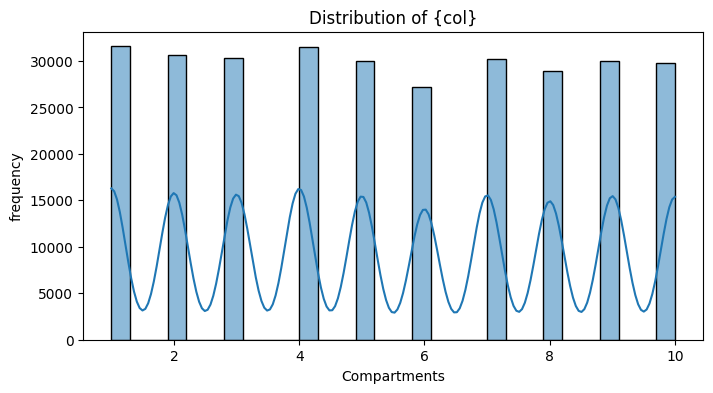

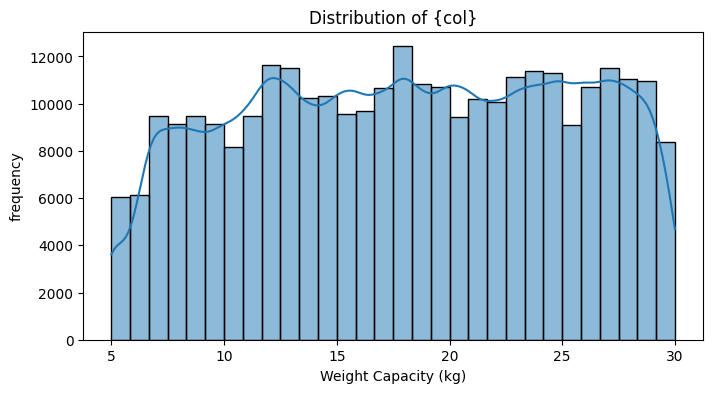

In [74]:
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(train_data[col],bins=30,kde=True)
    plt.title('Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

As per the above histogram 
compartments : the fig shows that they are evenly spaced peaks which is likely a discrete numerical feature with evenly distributed values 

weight capacity (kg) : this histogram shows that they are relatively uniformly distributed without strong skewness.

Now lets see skewness

In [76]:
for col in numerical_columns:
    skewness =train_data[col].skew()
    print(f'Skewness of {col}:{skewness}')

Skewness of Compartments:0.029124529079775485
Skewness of Weight Capacity (kg):-0.06423900616005432


As per the skewness 
comprtments skewness =0.029 --> near to 0 i.e almost symmetric 
weight capacity (kg) skewnewss --> -0.064 i.e amlost symmetric 

Now lets see the normality using qq plot


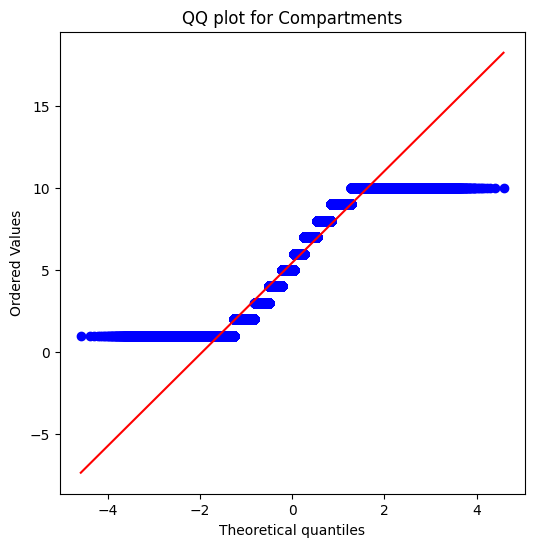

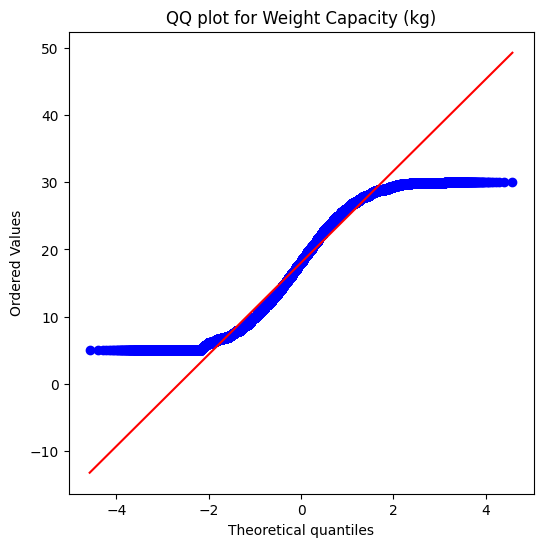

In [77]:
import scipy.stats as stats

for col in numerical_columns:
    plt.figure(figsize=(6,6))
    stats.probplot(train_data[col].dropna(),dist='norm',plot=plt)
    plt.title(f'QQ plot for {col}')
    plt.show()

QQ plot analysis

compartments : it shows a step like patterns which is quite expected in discrete variable and it didn't followed perfect normal distribution but isn't highly skewed 

Weight Capacity (Kg): here the plot deviates slightly at the extreme ends which shows some outliers but overall near to normal distribution 

In [80]:
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [81]:
## since both the distribution are approx normal I'm using mean here 

mean_weight = train_data['Weight Capacity (kg)'].mean()
train_data['Weight Capacity (kg)'].fillna(mean_weight,inplace=True)
test_data['Weight Capacity (kg)'].fillna(mean_weight,inplace=True)

/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_49052/673537019.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Weight Capacity (kg)'].fillna(mean_weight,inplace=True)
/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_49052/673537019.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [82]:
for col in categorical_columns:
    mode_value =train_data[col].mode()[0]
    train_data[col].fillna(mode_value,inplace=True)
    test_data[col].fillna(mode_value,inplace=True)
print('missing values handled in both train and test datasets')

missing values handled in both train and test datasets


/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_49052/2495414514.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(mode_value,inplace=True)
/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_49052/2495414514.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [83]:
categorical_columns

['Brand',
 'Material',
 'Size',
 'Laptop Compartment',
 'Waterproof',
 'Style',
 'Color']

In [84]:
## now lets encode the categorical valriables 

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

encoded_train=encoder.fit_transform(train_data[categorical_columns])
encoded_test = encoder.transform(test_data[categorical_columns])


In [85]:
# now converting to dataframe 
encoded_train_df = pd.DataFrame(encoded_train,columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test,columns=encoder.get_feature_names_out(categorical_columns))

train_data=train_data.drop(columns=categorical_columns).reset_index(drop=True)
test_data=test_data.drop(columns =categorical_columns).reset_index(drop=True)

train_data = pd.concat([train_data,encoded_train_df],axis=1)
test_data=pd.concat([test_data,encoded_test_df],axis=1)

print('encoding on categorical data is done ')

encoding on categorical data is done 


In [86]:
# Now scaling the numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[numerical_columns]=scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns]=scaler.transform(test_data[numerical_columns])

print('NUmerical features are scaled successfully ')

NUmerical features are scaled successfully 


In [87]:
print("Missing values in train:\n", train_data.isnull().sum())
print("\nMissing values in test:\n", test_data.isnull().sum())

print("\nColumns in train:", train_data.columns)
print("\nColumns in test:", test_data.columns)


Missing values in train:
 id                        0
Compartments              0
Weight Capacity (kg)      0
Price                     0
Brand_Adidas              0
Brand_Jansport            0
Brand_Nike                0
Brand_Puma                0
Brand_Under Armour        0
Material_Canvas           0
Material_Leather          0
Material_Nylon            0
Material_Polyester        0
Size_Large                0
Size_Medium               0
Size_Small                0
Laptop Compartment_No     0
Laptop Compartment_Yes    0
Waterproof_No             0
Waterproof_Yes            0
Style_Backpack            0
Style_Messenger           0
Style_Tote                0
Color_Black               0
Color_Blue                0
Color_Gray                0
Color_Green               0
Color_Pink                0
Color_Red                 0
dtype: int64

Missing values in test:
 id                        0
Compartments              0
Weight Capacity (kg)      0
Brand_Adidas              0
Brand_Jansp

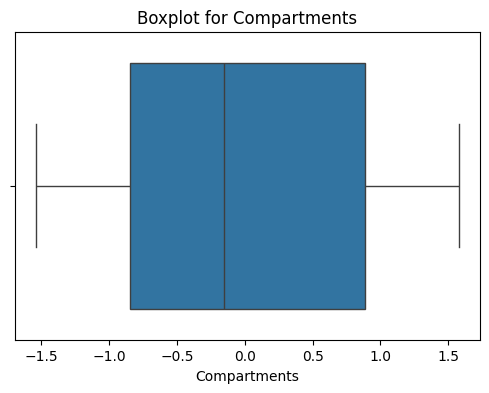

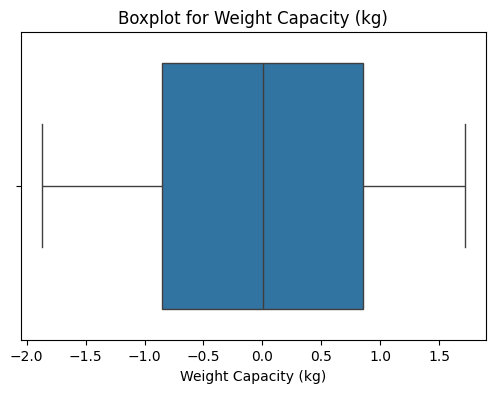

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [89]:
from sklearn.model_selection import train_test_split

X= train_data.drop(columns=['id','Price'])
y= train_data['Price']



In [90]:
X

,Compartments,Weight Capacity (kg),Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Canvas,Material_Leather,Material_Nylon,...,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.538408,-0.921464,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.576198,1.299089,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.191240,-0.199020,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.884338,-0.731164,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.537170,-0.040293,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.230268,-0.760797,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
299996,0.192479,1.235150,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
299997,1.230268,-0.880327,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
299998,-1.537170,-1.701902,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
y

0         112.15875
1          68.88056
2          39.17320
3          80.60793
4          86.02312
            ...    
299995    129.99749
299996     19.85819
299997    111.41364
299998    115.89080
299999     26.72762
Name: Price, Length: 300000, dtype: float64

In [92]:
X_train , X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=10)

print('Split done on training set ')

Split done on training set 


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

y_pred =lr_model.predict(X_val)

mae = mean_absolute_error(y_val,y_pred)
rmse = mean_squared_error(y_val,y_pred,squared=False)
print(f"🔹 Linear Regression - MAE: {mae:.4f}, RMSE: {rmse:.4f}")


🔹 Linear Regression - MAE: 33.8584, RMSE: 39.0957


/Users/akashpal/Desktop/Practise/.conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [94]:
# for better peroformance lets use Xgboost 

import xgboost as xgb

xgb_model =xgb.XGBRegressor(n_estimators =10, learning_rate=0.1,random_state=10)

xgb_model.fit(X_train,y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [95]:
xgb_model.fit(X_train,y_train)
y_pred_xgb = xgb_model.predict(X_val)

In [96]:
mae_xgb = mean_absolute_error(y_val,y_pred_xgb)
rmse_xgb = mean_squared_error(y_val,y_pred_xgb,squared=False)

/Users/akashpal/Desktop/Practise/.conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:
print('Mae:',mae_xgb)
print('RMSE:',rmse_xgb)


Mae: 33.85919509887187
RMSE: 39.09719000350614


In [98]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

# Grid search
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Predict
y_pred_best = best_xgb.predict(X_val)

# Evaluate
mae_best = mean_absolute_error(y_val, y_pred_best)
rmse_best = mean_squared_error(y_val, y_pred_best, squared=False)

print(f"✅ Tuned XGBoost - MAE: {mae_best:.4f}, RMSE: {rmse_best:.4f}")


✅ Tuned XGBoost - MAE: 33.8503, RMSE: 39.0928


/Users/akashpal/Desktop/Practise/.conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [99]:
# Ensure test data does not have 'Price'
X_test = test_data.drop(columns=['id', 'Price'], errors='ignore')

# Predict using the trained model
test_data['Price'] = best_xgb.predict(X_test)

print("✅ Predictions on test data completed successfully!")


✅ Predictions on test data completed successfully!


In [100]:
# Create submission file
submission = test_data[['id', 'Price']]

# Save as CSV
submission.to_csv('submission.csv', index=False)

print("✅ Submission file 'submission.csv' is ready! 🚀")


✅ Submission file 'submission.csv' is ready! 🚀
